In [1]:
# コントラスト法で奥行きを求める
import json
import glob
import cv2
import os, sys
import gzip
import numpy as np
import dotenv
import argparse
import matplotlib.pyplot as plt

In [2]:
# compute RMS contract of im
def RMS_contrast(im):
    img_grey = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    contrast = img_grey.std()

    return contrast

# compute Michelson contrast
def Michelson_contrast(im):
    Y = cv2.cvtColor(im, cv2.COLOR_BGR2YUV)[:,:,0]
    
    # compute min and max of Y
    min = np.min(Y)
    max = np.max(Y)

    # compute contrast
    contrast = (max-min)/(max+min)

    return contrast

In [3]:
if __name__ == '__main__':
    DIR = 'data/202410080808'
    
    PSIZE = 65
    width = 1600
    height = 1200
    STEP = 1

    # contrast values
    cvalues = []
    # focus values
    fvalues = []

    files = glob.glob(os.path.join(DIR,'*.bmp'))

    for fn in files:
        im = cv2.imread(fn)
        if im is None:
            continue

        fvalue = int(os.path.splitext(os.path.basename(fn))[0])
        fvalues.append(fvalue)
        print("image", fn, "fvalue", fvalue)
        
        cvalue = []
        for y in range(0,height-PSIZE,STEP):
            for x in range(0,width-PSIZE,STEP):
                patch = im[y:(y+PSIZE),x:(x+PSIZE),:]
                cvalue.append(RMS_contrast(patch))
        cvalue = np.array(cvalue)
        cvalue = cvalue.reshape((int((height-PSIZE)/STEP),int((width-PSIZE)/STEP)))
        cvalues.append(cvalue)

image data/202410080808\10000.bmp fvalue 10000
image data/202410080808\10050.bmp fvalue 10050
image data/202410080808\10100.bmp fvalue 10100
image data/202410080808\10150.bmp fvalue 10150
image data/202410080808\10200.bmp fvalue 10200
image data/202410080808\10250.bmp fvalue 10250
image data/202410080808\10300.bmp fvalue 10300
image data/202410080808\10350.bmp fvalue 10350
image data/202410080808\10400.bmp fvalue 10400
image data/202410080808\10450.bmp fvalue 10450
image data/202410080808\10500.bmp fvalue 10500
image data/202410080808\10550.bmp fvalue 10550
image data/202410080808\10600.bmp fvalue 10600
image data/202410080808\10650.bmp fvalue 10650
image data/202410080808\10700.bmp fvalue 10700
image data/202410080808\10750.bmp fvalue 10750
image data/202410080808\10800.bmp fvalue 10800
image data/202410080808\10850.bmp fvalue 10850
image data/202410080808\10900.bmp fvalue 10900
image data/202410080808\10950.bmp fvalue 10950
image data/202410080808\11000.bmp fvalue 11000
image data/20

In [4]:
    # コントラストの最大値を奥行きとする．depth_index = 画像，depth = フォーカス値
    cvalues = np.stack(cvalues)
    depth_index = np.argmax(cvalues,axis=0)
    depth = depth_index.astype("uint64")
    for i in range(len(cvalues)):
        depth[np.where(depth == i)] = fvalues[i]

In [5]:
    # 保存する
    import pickle

    fname = os.path.join(DIR,"index.bmp")
    cv2.imwrite(fname, depth_index)
    with open(os.path.join(DIR,'depth.pkl'),"wb") as f:
        pickle.dump(depth, f)

(array([[ 21.,   0.,   0., ..., 948.,   0.,   0.],
        [ 21.,   0.,   0., ..., 930.,   0.,   0.],
        [ 20.,   1.,   0., ..., 928.,   0.,   0.],
        ...,
        [ 75.,  10.,   0., ..., 976.,   0.,   0.],
        [ 76.,   7.,   0., ..., 979.,   0.,   0.],
        [ 66.,   0.,   0., ..., 986.,   0.,   0.]]),
 array([17100., 18590., 20080., 21570., 23060., 24550., 26040., 27530.,
        29020., 30510., 32000.]),
 <a list of 1535 BarContainer objects>)

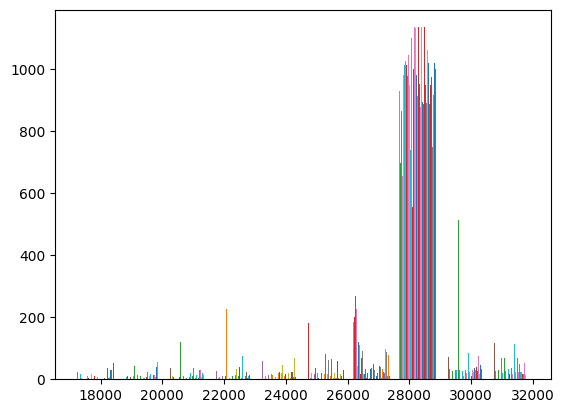

In [6]:
    plt.hist(depth)

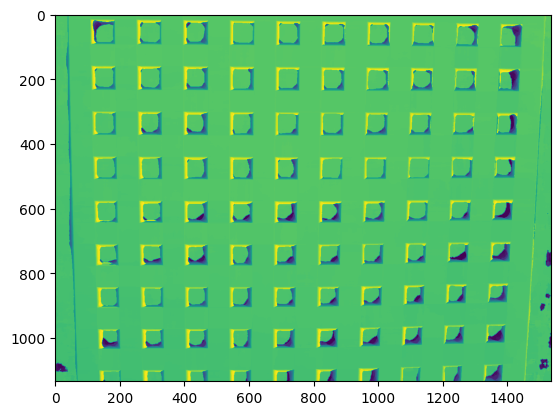

In [7]:
    plt.imshow(depth)

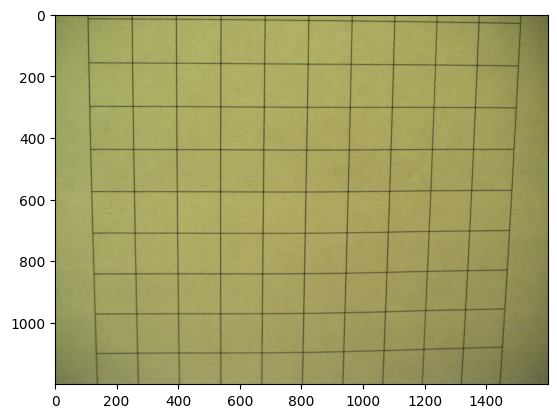

In [10]:
    #元画像
    fname = os.path.join(DIR,'28000.bmp')
    im = cv2.imread(fname)
    im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
    plt.imshow(im)

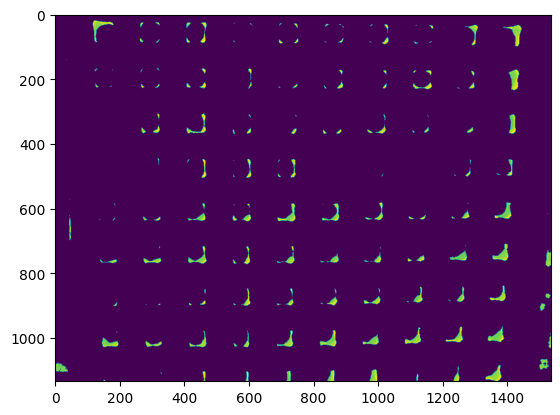

In [11]:
    depth2 = depth
    THRESH = 22000
    depth2[np.where(depth2 > THRESH)] = 0
    plt.imshow(depth2)